In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

% matplotlib inline

## Polynomial fit with Chi-square vs order of fit

In [3]:
#complex data
N = 20  # number of points
K = 10  #order-K of polynomial
points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
noise = np.var(fx)*0.01  #noise of measure
ys = fx + np.random.randn()*noise  #signal


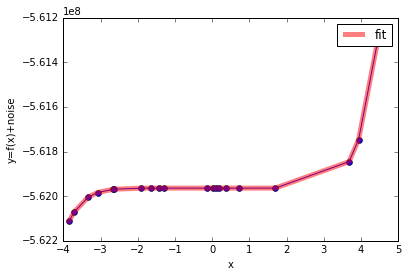

In [4]:
#plotting
plt.plot(points,ys,'-o')
plt.xlabel('x')
plt.ylabel('y=f(x)+noise')

##poly-fitting
p = numpy.polyfit(points, ys, K)
plt.plot(points,np.polyval(p, points),'r',linewidth=5,alpha=0.5,label='fit')
plt.legend()

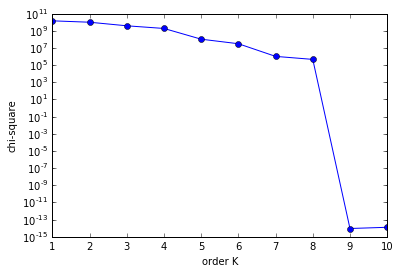

In [5]:
#chi-square measure
chis = []
for ks in range(1,11):
    p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
    chisq_dof = residuals[0] / (len(points) - 3)
    chis.append(chisq_dof)
    
plt.semilogy(np.arange(1,K+1),chis,'-o')
plt.xlabel('order K')
plt.ylabel('chi-square')

## Minimum energy per data point

In [27]:
#energy scaling
rep = 30  #repeat instantiation
N = 30  #more points
K = 10  #order-K of polynomial
minE = []
for rr in range(0,rep):  #repeat instantiation
    points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
    coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
    fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
    noise = np.var(fx)*0.01  #noise of measure
    ys = fx + np.random.randn()*noise  #signal
    chis = []
    for ks in range(1,K+1):
        p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
        chisq_dof = residuals[0] / (len(points) - 3)
        chis.append(chisq_dof)
    minE.append(np.array(chis)/N)

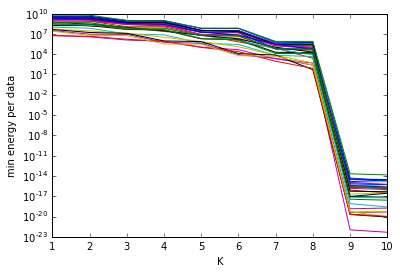

In [28]:
plt.semilogy(np.arange(1,K+1),np.array(minE).T);
plt.xlabel('K')
plt.ylabel('min energy per data')

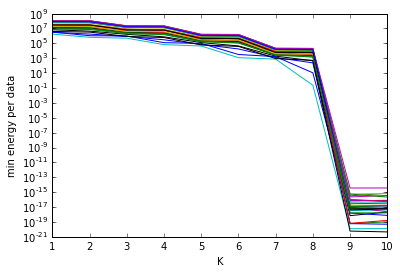

In [29]:
#energy scaling
rep = 30  #repeat instantiation
N = 1000  #even more points
K = 10  #order-K of polynomial
minE = []
for rr in range(0,rep):  #repeat instantiation
    points = np.sort(np.random.rand(N)*10-5)  #-5~5 range
    coeffs = np.random.rand(K)*2-1  #-1~1  coefficents
    fx = np.array([sum([c*p**i for i,c in enumerate(coeffs)]) for p in points])  #f(x) signal
    noise = np.var(fx)*0.01  #noise of measure
    ys = fx + np.random.randn()*noise  #signal
    chis = []
    for ks in range(1,K+1):
        p, residuals, _, _, _ = np.polyfit(points, ys, ks, full=True)
        chisq_dof = residuals[0] / (len(points) - 3)
        chis.append(chisq_dof)
    minE.append(np.array(chis)/N)
    
plt.semilogy(np.arange(1,K+1),np.array(minE).T);
plt.xlabel('K')
plt.ylabel('min energy per data')

## Nontrivial optimum K order